# Load the data

In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import string
from sklearn.preprocessing import FunctionTransformer
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [201]:
frown = pd.read_csv('./tweetsfrown.txt', header=None, usecols=[3], 
    names=['text']).sample(n=10000, random_state=0)
print(frown.shape)
frown['label'] = 1
frown

(10000, 1)


,text,label
15252,"""text"": ""RT @mintwirls: giving jiminie comfor...",1
23206,"""text"": ""RT @MHKLOOKS: mark &amp; haechan hav...",1
5886,"""text"": ""RT @jeonsfairyy: just a reminder tha...",1
8474,"""text"": ""RT @kosmicyoon: oh god. seokjin want...",1
22185,"""text"": ""RT @anna_murphhh: Can you guys pleas...",1
...,...,...
25330,"""text"": ""i miss my dad :(""",1
8275,"""text"": ""my tiny renjun my babie :(""",1
8299,"""text"": ""RT @khjactivity: \""I'm so happy. you...",1
13048,"""text"": ""@dines77bijarnia Thank you Dinesh",1


In [202]:
smile = pd.read_csv('./tweetssmile.txt', header=None, usecols=[3], 
    names=['text']).sample(n=10000, random_state=0)
print(smile.shape)
smile['label'] = 0
smile

(10000, 1)


,text,label
9770,"""text"": ""@kikyammi @greybkg aaah okay !! :)""",0
59144,"""text"": ""RT @DaanCrypto: All the dog coins st...",0
19825,"""text"": ""RT @makxlynnn: Hi",0
470,"""text"": ""RT @LoboSHOfficial: Today's Update\n...",0
19842,"""text"": ""@Leerzeit Showing support for the SE...",0
...,...,...
49949,"""text"": ""@ITEC00L Have safe flight bea. :)""",0
16786,"""text"": ""@zza1988 @havinaradox @nexta_tv If i...",0
36916,"""text"": ""@reganzon99 Well",0
7251,"""text"": ""RT @B0YTROY: two xanax and a melaton...",0


In [203]:
from sklearn.model_selection import train_test_split

tweets = pd.concat([smile, frown])
print(tweets.shape)
X_train, X_test, y_train, y_test = train_test_split(tweets['text'], tweets['label'], train_size=0.75,test_size=0.25)
tweets.head()

(20000, 2)


,text,label
9770,"""text"": ""@kikyammi @greybkg aaah okay !! :)""",0
59144,"""text"": ""RT @DaanCrypto: All the dog coins st...",0
19825,"""text"": ""RT @makxlynnn: Hi",0
470,"""text"": ""RT @LoboSHOfficial: Today's Update\n...",0
19842,"""text"": ""@Leerzeit Showing support for the SE...",0


In [121]:
for i in X_train:
    print(i)

 "text": "RT @dmytro_sazonov: Hi guys. Today I just signed up in Twitter and this is my first post in here. Newbie :)\nI have been experimenting with\u2026"
 "text": "RT @Seoul_Merchant: FREE SEALED ALBUM GIVEAWAY / surprise dm \n\nfollow us + rt\nreply\n\nends tonight! :)"
 "text": "RT @JE0NGHANSVT_: hi team concert &amp; team labas carats \ud83d\udce2\n \nexactly a month from now before #BETHESUNinMNL ! we'll be giving away freebies on\u2026"
 "text": "@l1ttl3_st4rs Thank you for helping me :)"
 "text": "RT @000914_HAN: #MANIACinJKT Freebies - by @000914_HAN\n\n\ud83d\uddd3 : 12-13 November 2022\n\ud83d\udccd : Beach City Internasional Stadium\n\u23f0 : TBA\n\n\u2661 Say Hi\n\u2661 Fi\u2026"
 "text": "RT @themeatly: When #BATDR comes out
 "text": "@Wannabeeddswor1 @munierunoyatu No why is tord crying? :("
 "text": "This fucking killed me WHYYYYYY https://t.co/oGD8Yz7xQ6"
 "text": "@elonmusk Sorry no edit button :("
 "text": "@toothlesbahamut I'll be talking about things in the stream

# Iteration 1: Sequential() model with Embedding

## Data prep

In [204]:
def preprocess(docs):
    """
    Prepare data from text documents for NLP:
    - Remove Twitter mentions and RT
    - Remove all the special characters
    - Remove all single characters
    - Substitute multiple spaces with single space
    - Convert to Lowercase

    Parameters:
    docs (n x 1 array or string): Documents.

    Returns: Array of processed docs.
    """
    clean_docs = []
    for doc in docs:
        # Remove everything before the third quotation:
        processed = re.sub(r'^.*": "', '', doc)

        # Remove any @ mentions
        processed = re.sub(r'.*@\w*\S*\s', '', processed)

        # Remove any words with symbols 
        processed = re.sub(r'(RT\s*)?\W*@\w*', '', processed)

        # Remove URLs
        processed = re.sub(r'\s*https?:\S*', '', processed)
        
        clean_docs.append(processed)
    return np.array(clean_docs)

print(preprocess(X_train))

['Sir D with a six :)' 'she was crying :('
 '[#\\ubc15\\uc18c\\uc740] November :-) \\ud83d\\udda4\\n\\n#Weeekly #\\uc704\\ud074\\ub9ac\\n#ParkSoeun'
 ... 'Heaven to my ears \\ud83e\\udd7a"'
 'taekook dances together like this listening to jazz on lazy evenings :(  \\n\\n'
 'and here is when i realized he\\u2019s really going to go ):"']


In [205]:
vectorizer = TfidfVectorizer(
    max_df = .95,
    stop_words='english'
)

In [206]:
from sklearn.pipeline import Pipeline


preprocess_pipe = Pipeline([
    ('preprocess', FunctionTransformer(preprocess)),
    ('vectorize', vectorizer)
])
preprocess_pipe.fit(X_train)
X_train_vec = preprocess_pipe.transform(X_train).toarray()
X_test_vec = preprocess_pipe.transform(X_test).toarray()

In [207]:
print(X_train_vec.shape)
print(X_test_vec.shape)
print(len(vectorizer.vocabulary_))

(15000, 12761)
(5000, 12761)
12761


## Model

In [126]:
from tensorflow.python.keras.models import Sequential
from keras import layers

embedding_dim = 50

sequential_model = Sequential()
sequential_model.add(layers.Embedding(input_dim=len(vectorizer.vocabulary_), # SH: In this case, input_dim and input_length are the same
                           output_dim=embedding_dim, 
                           input_length=X_train_vec.shape[1]
                           ))
sequential_model.add(layers.GlobalMaxPool1D())
sequential_model.add(layers.Dense(10, activation='relu'))
sequential_model.add(layers.Dense(1, activation='sigmoid'))
sequential_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [127]:
X_train_vec.shape

(15000, 12611)

In [128]:
history = sequential_model.fit(X_train_vec, y_train,
                    epochs=10,
                    validation_data=(X_test_vec, y_test),
                    batch_size=10)

sequential_model.summary()

Epoch 1/10
1500/1500 [==============================] - 128s 84ms/step - loss: 0.6927 - accuracy: 0.5109 - val_loss: 0.6922 - val_accuracy: 0.5114
Epoch 2/10
1500/1500 [==============================] - 155s 104ms/step - loss: 0.6922 - accuracy: 0.5147 - val_loss: 0.6922 - val_accuracy: 0.5114
Epoch 3/10
1500/1500 [==============================] - 129s 86ms/step - loss: 0.6924 - accuracy: 0.5147 - val_loss: 0.6922 - val_accuracy: 0.5114
Epoch 4/10
1500/1500 [==============================] - 131s 87ms/step - loss: 0.6923 - accuracy: 0.5147 - val_loss: 0.6921 - val_accuracy: 0.5114
Epoch 5/10
1500/1500 [==============================] - 115s 77ms/step - loss: 0.6923 - accuracy: 0.5147 - val_loss: 0.6923 - val_accuracy: 0.5114
Epoch 6/10
1500/1500 [==============================] - 136s 91ms/step - loss: 0.6925 - accuracy: 0.5146 - val_loss: 0.6922 - val_accuracy: 0.5114
Epoch 7/10
1500/1500 [==============================] - 133s 88ms/step - loss: 0.6924 - accuracy: 0.5147 - val_loss: 

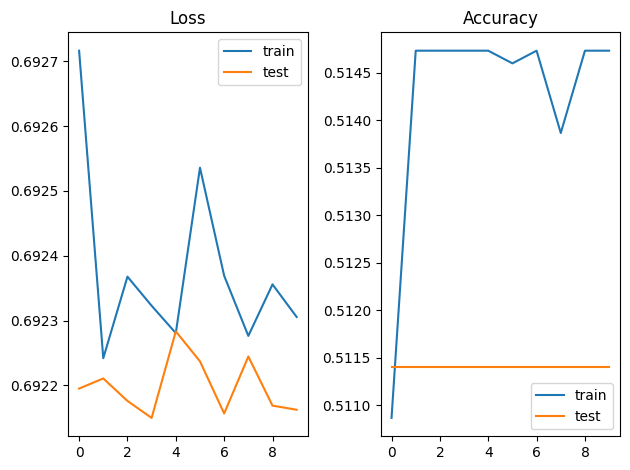

In [131]:
from matplotlib import pyplot as plt
import seaborn as sns
# plot history
def plot_training_metrics(history):
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(history.history['loss'], ax=ax[0], label='train')
    sns.lineplot(history.history['val_loss'], ax=ax[0], label='test')
    ax[0].set_title('Loss')

    sns.lineplot(history.history['accuracy'], ax=ax[1], label='train')
    sns.lineplot(history.history['val_accuracy'], ax=ax[1], label='test')
    ax[1].set_title('Accuracy')
    plt.tight_layout()

plot_training_metrics(history)


# Iteration 2: Sequential Model With Better Data Prep
* Lemmetization
* Limiting the length of vectors/features

In [142]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(X_train)


# # Obtain Tokenizer vectors for the documents
# X_train_vec2 = tokenizer.texts_to_sequences(X_train)
# X_test_vec2 = tokenizer.texts_to_sequences(X_train)

# vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

# # Pad vectors with zeros to make them all equal size
# from keras_preprocessing.sequence import pad_sequences
# maxlen = 100
# X_train_vec2 = pad_sequences(X_train_vec2, padding='post', maxlen=maxlen)
# X_test_vec2 = pad_sequences(X_test_vec2, padding='post', maxlen=maxlen)

In [196]:
from nltk.stem import WordNetLemmatizer
def preprocess2(docs):
    """
    Prepare data from text documents for NLP:
    - Remove Twitter mentions and RT
    - Remove all the special characters
    - Remove all single characters
    - Substitute multiple spaces with single space
    - Convert to Lowercase

    Parameters:
    docs (n x 1 array or string): Documents.

    Returns: Array of processed docs.
    """
    clean_docs = []
    for doc in docs:
        # Remove everything before the third quotation:
        processed = re.sub(r'^.*": "', '', doc)

        # Remove any @ mentions
        processed = re.sub(r'.*@\w*\S*\s', '', processed)

        # Remove any words with symbols 
        processed = re.sub(r'(RT\s*)?\W*@\w*', '', processed)

        # Remove URLs
        processed = re.sub(r'\s*https?:\S*', '', processed)
        
        # Lemmatize
        wnl = WordNetLemmatizer()
        processed = ''.join([wnl.lemmatize(word) for word in processed.split()])

        clean_docs.append(processed)
    return np.array(clean_docs)

print(preprocess2(X_test))

['Havefunandgoodluck!:)"'
 'Thedamis140mhighandthelakearethebiggestfreshwaterlakeofAustralia.:)"'
 'imisshimimissmytaehyungimissmybabylambthelightofmylife:(' ...
 'Doyoulikemyhairypussy?:)'
 '#warofhormoneby#btsneed5.8Mstreamtohit100M:)pleaseputitintoyourplaylist:)\\n\\n'
 'ptd!itwatrulythemostamazing']


In [209]:
from nltk.stem import WordNetLemmatizer
vectorizer2 = vectorizer = TfidfVectorizer(
    max_df = .95,
    stop_words='english',
    max_features = 2500
)
wnl = WordNetLemmatizer()
preprocess_pipe2 = Pipeline([
    ('preprocess2', FunctionTransformer(preprocess2)),
    ('vectorize2', vectorizer2)
])
preprocess_pipe2.fit(X_train)

Pipeline(steps=[('preprocess2',
                 FunctionTransformer(func=<function preprocess2 at 0x00000221CB0BA040>)),
                ('vectorize2',
                 TfidfVectorizer(max_df=0.95, max_features=2500,
                                 stop_words='english'))])

In [210]:
X_train_vec2 = preprocess_pipe2.transform(X_train).toarray()
X_test_vec2 = preprocess_pipe2.transform(X_test).toarray()
print(X_train_vec2.shape)
print(X_test_vec2.shape)
print(len(vectorizer.vocabulary_))

(15000, 2500)
(5000, 2500)
2500


## Model

In [212]:
from tensorflow.python.keras.models import Sequential
from keras import layers

embedding_dim = 50

sequential_model2 = Sequential()
sequential_model2.add(layers.Embedding(input_dim=len(vectorizer2.vocabulary_), # SH: In this case, input_dim and input_length are the same
                           output_dim=embedding_dim, 
                           input_length=X_train_vec2.shape[1]
                           ))
sequential_model2.add(layers.GlobalMaxPool1D())
sequential_model2.add(layers.Dense(10, activation='relu'))
sequential_model2.add(layers.Dense(1, activation='sigmoid'))
sequential_model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [213]:
history2 = sequential_model2.fit(X_train_vec2, y_train,
                    epochs=10,
                    validation_data=(X_test_vec2, y_test),
                    batch_size=10)

Epoch 1/10
1500/1500 [==============================] - 30s 18ms/step - loss: 0.6907 - accuracy: 0.5291 - val_loss: 0.6912 - val_accuracy: 0.5292
Epoch 2/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.6902 - accuracy: 0.5365 - val_loss: 0.6913 - val_accuracy: 0.5292
Epoch 3/10
1500/1500 [==============================] - 30s 20ms/step - loss: 0.6903 - accuracy: 0.5365 - val_loss: 0.6911 - val_accuracy: 0.5292
Epoch 4/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.6903 - accuracy: 0.5365 - val_loss: 0.6911 - val_accuracy: 0.5292
Epoch 5/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.6903 - accuracy: 0.5365 - val_loss: 0.6910 - val_accuracy: 0.5292
Epoch 6/10
1500/1500 [==============================] - 23s 15ms/step - loss: 0.6903 - accuracy: 0.5365 - val_loss: 0.6915 - val_accuracy: 0.5292
Epoch 7/10
1500/1500 [==============================] - 35s 24ms/step - loss: 0.6902 - accuracy: 0.5365 - val_loss: 0.6912 -

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_24 (ModuleWra (10, 2500, 50)            125000    
_________________________________________________________________
module_wrapper_25 (ModuleWra (10, 50)                  0         
_________________________________________________________________
module_wrapper_26 (ModuleWra (10, 10)                  510       
_________________________________________________________________
module_wrapper_27 (ModuleWra (10, 1)                   11        
Total params: 125,521
Trainable params: 125,521
Non-trainable params: 0
_________________________________________________________________
None


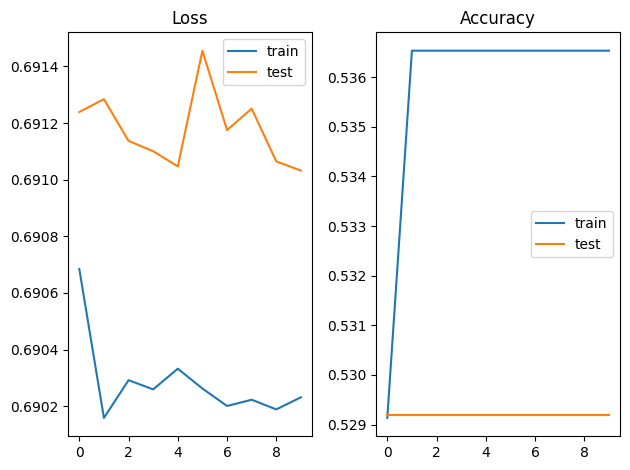

In [214]:
print(sequential_model2.summary())
plot_training_metrics(history2)

# Iteration 3: with BernoulliNB

In [233]:
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import BernoulliNB

vectorizer2 = vectorizer = TfidfVectorizer(
    max_df = .95,
    stop_words='english',
    max_features = 2500
)
wnl = WordNetLemmatizer()
pipeline3 = Pipeline([
    ('preprocess2', FunctionTransformer(preprocess2)),
    ('vectorize2', vectorizer2),
    ('Bernoulli',BernoulliNB())
])
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocess2',
                 FunctionTransformer(func=<function preprocess2 at 0x00000221CB0BA040>)),
                ('vectorize2',
                 TfidfVectorizer(max_df=0.95, max_features=2500,
                                 stop_words='english')),
                ('Bernoulli', BernoulliNB())])

In [242]:
def evaluate_classifier2(classifier, X_test, y_test, X_train, y_train, pos_label=1,model_name='classifier', confusion_matrix=True):
    """
    Print evaluation metrics of the classifier. Classifier should be fit prior to calling this function.
        * recall
        * precision
        * F1
        * AUC score (only if class labels are integers)
    Plot:
        * confusion matrix
        * ROC (only if class labels are integers)
    Parameters:
    - pos_label (str or int): Class label for positive class. Default is 1.
    - model_name (string, optional): Name of model printing purposes.
    - confusion_matrix (bool): If True (default), print the confusion matrix. 

    Returns 2 dictionaries:
    - evaluation metrics for test data
    - evaluation metrics train data set
    """
    
    best_model = classifier

    y_pred = best_model.predict(X_test)

    y_pred_train = best_model.predict(X_train)

    # Metrics for test data
    metrics = dict()
    if len(set(y_test)) == 2:
        recall = recall_score(y_test, y_pred, pos_label=pos_label)
        precision = precision_score(y_test, y_pred, pos_label=pos_label)
        f1score = f1_score(y_test, y_pred, pos_label=pos_label)
        metrics['recall'] = recall
        metrics['precision'] = precision
        metrics['f1'] = f1score

    accuracy = accuracy_score(y_test, y_pred)
    metrics['accuracy'] = accuracy

    # Metrics for training data
    metrics_train = dict()
    if len(set(y_test)) == 2:
        recall_train = recall_score(y_train, y_pred_train, pos_label=pos_label)
        precision_train = precision_score(y_train, y_pred_train, pos_label=pos_label)
        f1score_train = f1_score(y_train, y_pred_train, pos_label=pos_label)
        metrics_train['recall'] = recall_train
        metrics_train['precision'] = precision_train
        metrics_train['f1'] = f1score_train
    accuracy_train = accuracy_score(y_train, y_pred_train)
    metrics_train['accuracy'] = accuracy_train

    print(f'\n{model_name} evaluation metrics: \n\tTest data\tTraining data\t\tDifference')
    print(f'Accuracy: \t{100*accuracy:.2f}%\t\t{100*accuracy_train:.2f}%\t\t{100*(accuracy-accuracy_train):.2f}%')
    if len(set(y_test)) == 2:
        print(f'Recall: \t{100*recall:.2f}%\t\t{100*recall_train:.2f}%\t\t{100*(recall-recall_train):.2f}%')
        print(f'Precision: \t{100*precision:.2f}%\t\t{100*precision_train:.2f}%\t\t{100*(precision-precision_train):.2f}%')
        print(f'F1: \t\t{100*f1score:.2f}%\t\t{100*f1score_train:.2f}%\t\t{100*(f1score-f1score_train):.2f}%')
        if type(y_test) == 'int':
            auc = roc_auc_score(y_test, y_pred)
            auc_train = roc_auc_score(y_train, y_pred_train)
            print(f'AUC: \t\t{100*auc:.2f}%\t\t{100*auc_train:.2f}%\t\t{100*(auc-auc_train):.2f}%')
            RocCurveDisplay.from_estimator(best_model, X_train, y_train)
            metrics['auc'] = auc
    if confusion_matrix==True:
        ConfusionMatrixDisplay.from_estimator(best_model, X_train, y_train)
    return metrics, metrics_train


BournoulliNB classifier evaluation metrics: 
	Test data	Training data		Difference
Accuracy: 	72.88%		76.11%		-3.23%
Recall: 	90.60%		92.05%		-1.45%
Precision: 	66.89%		69.79%		-2.90%
F1: 		76.96%		79.39%		-2.43%


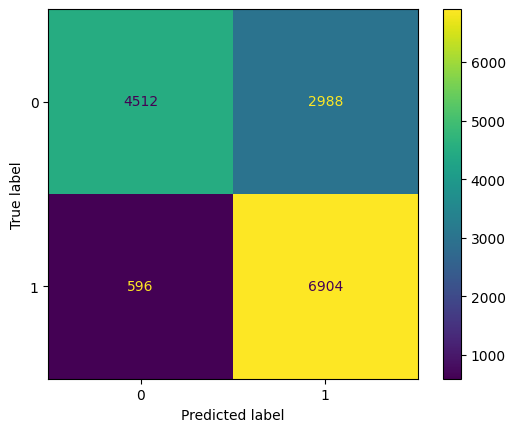

In [243]:
from modelling import *

metrics, metrics_train = evaluate_classifier2(pipeline3, X_test, y_test, X_train, y_train, 
    pos_label=1,model_name='BournoulliNB classifier',confusion_matrix=True)

# *End of Page*